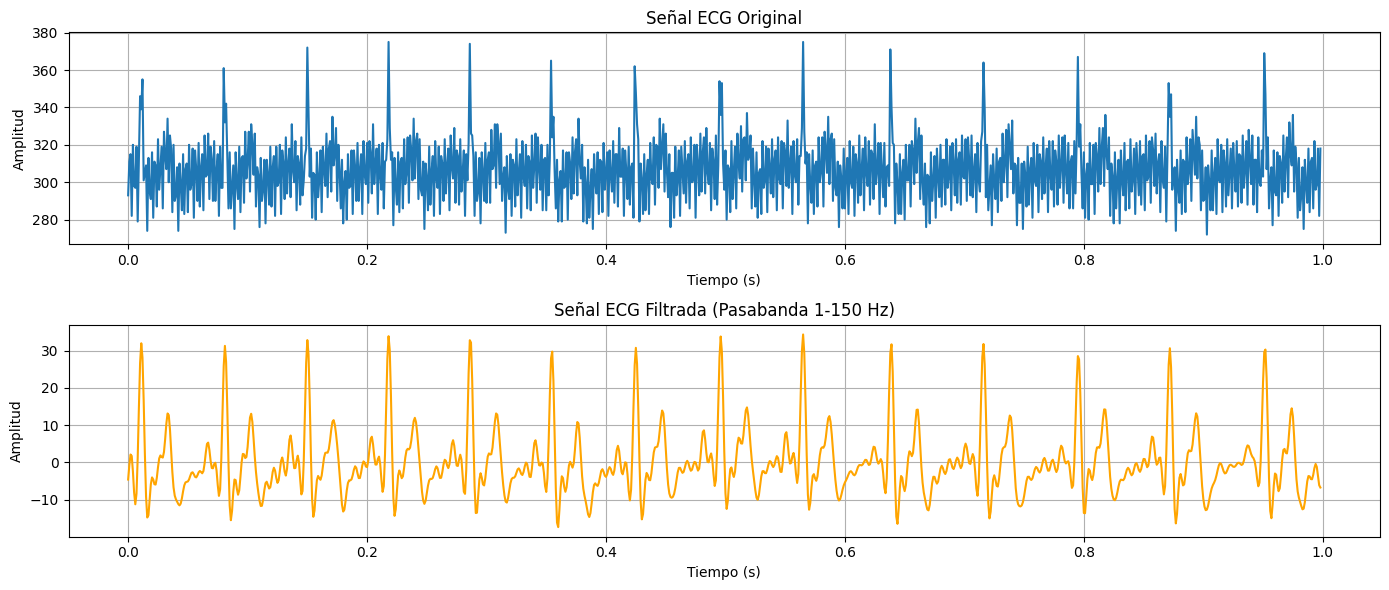

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# Cargar archivo Excel
file_path = 'datos_ecg.xlsx'
df = pd.read_excel(file_path)

# Extraer la señal
signal = df.iloc[:, 0].values

# Parámetros de muestreo
fs = 1000  # Frecuencia de muestreo en Hz
N = len(signal)
t = np.arange(N) / fs  # Vector de tiempo

# Transformada de Fourier
signal_fft = fft(signal)
freqs = fftfreq(N, 1/fs)

# Filtro pasabanda entre 300 y 380 Hz
bandpass_mask = (np.abs(freqs) >= 1) & (np.abs(freqs) <= 150)

# Aplicar la máscara al espectro de frecuencia
filtered_fft = signal_fft * bandpass_mask

# Transformada inversa para obtener la señal filtrada
filtered_signal = np.real(ifft(filtered_fft))

# Graficar resultados
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Señal original')
plt.title('Señal ECG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Señal filtrada [1-150 Hz]', color='orange')
plt.title('Señal ECG Filtrada (Pasabanda 1-150 Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

plt.tight_layout()
plt.show()